In [1]:
#Flight Data Set
import pandas as pd
import numpy as np
df_test=pd.read_excel(r'C:\DataSet\Data_Train.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [2]:
df_test.shape

(10683, 11)

In [3]:
df_test.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
df_test.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [5]:

print(df_test['Source'].unique())
df_test['Destination'].unique()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Sorting the entire dataset on date of journey
df_test.sort_values('Date_of_Journey', inplace = True)

In [8]:
#Converting the Date_of_journey into date, month and year.
df_test['year'] = pd.DatetimeIndex(df_test['Date_of_Journey']).year
df_test['month'] = pd.DatetimeIndex(df_test['Date_of_Journey']).month
df_test['Day'] = pd.DatetimeIndex(df_test['Date_of_Journey']).day

In [9]:
df_test['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

Text(0, 0.5, 'Price of ticket')

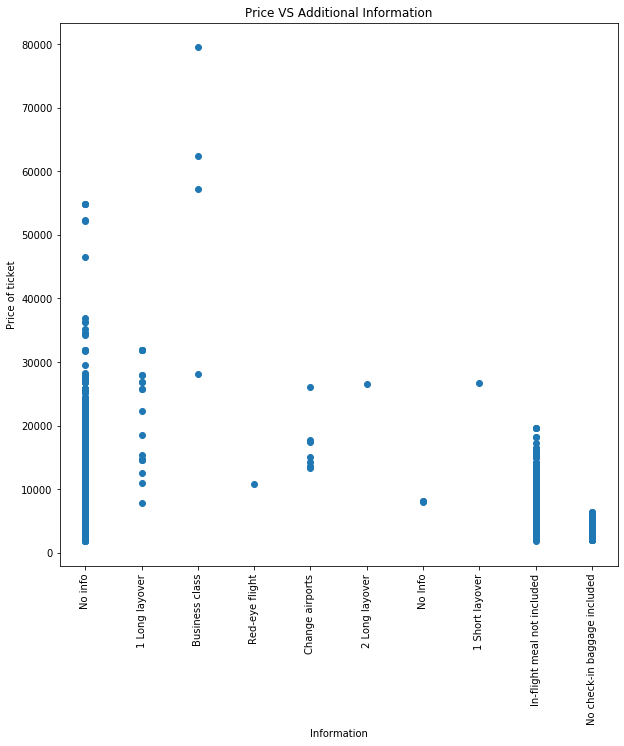

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(df_test['Additional_Info'], df_test['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

Text(0, 0.5, 'Count of flights')

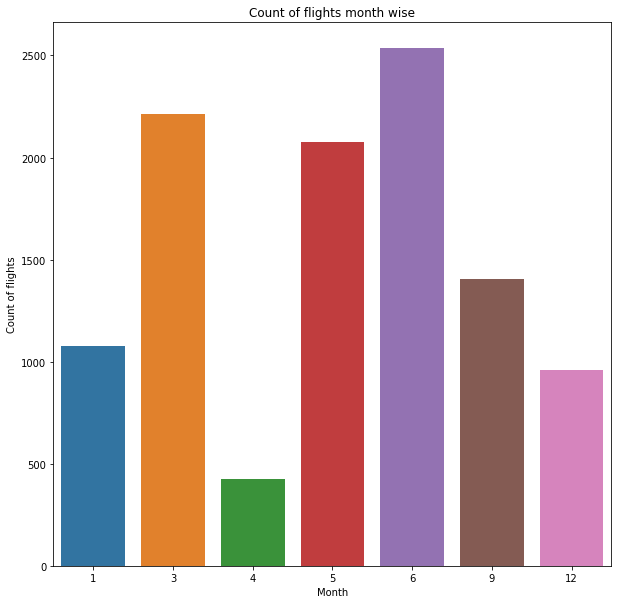

In [11]:
#From above scatter plot it is clear that the ticket prices for Business class is higher.
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = df_test)
plt.xlabel('Month')
plt.ylabel('Count of flights')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

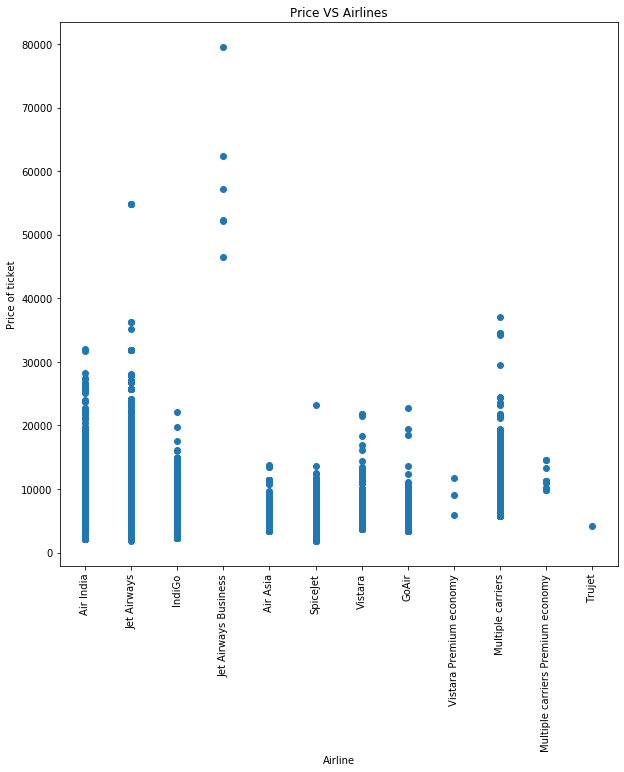

In [12]:
#from above graph its concluded that there are around 2500 flights scheduled in the month of may so at 
#this time can be the peak month for the airlines as compared to april which seems like slack season for airlines.
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(df_test['Airline'], df_test['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

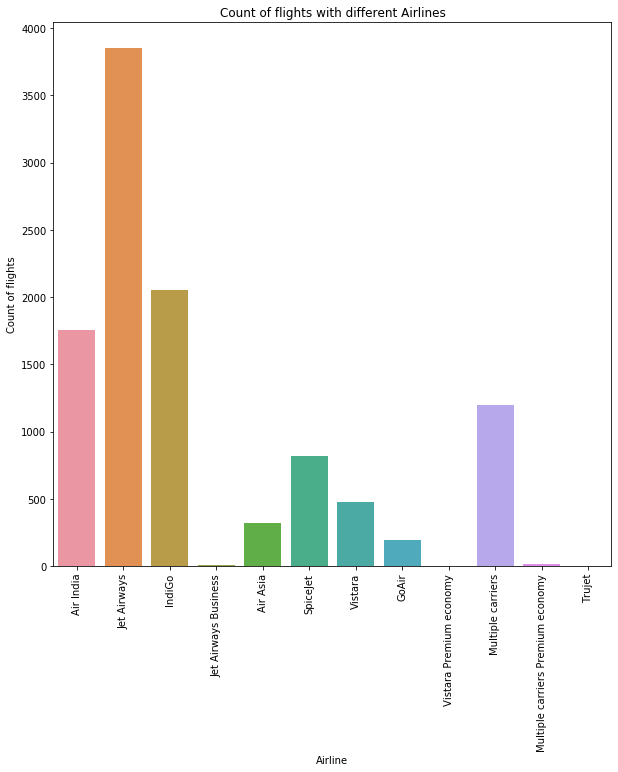

In [13]:
# from above its seems that the ticket rate for Jet Airways Business airline is high.
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df_test)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [14]:
#from above figure 2 observations are concluded that
#There are more number of flights of Jet Airways.
# Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

In [15]:
#Converting sparse classes of Airline into one category
df_test['Airline'].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

In [16]:
#Converting the Total_Stops into numbers and dropping the rows with NaN
df_test[df_test['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,2019,6,5


In [17]:
df_test.dropna(axis = 0, inplace = True)

In [18]:
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0

In [19]:
df_test['Total_Stops'] = df_test['Total_Stops'].map(convert_into_stops)

In [20]:
df_test.fillna(0, inplace  = True)
df_test['Total_Stops'] = df_test['Total_Stops'].apply(lambda x : int(x))

In [21]:
#Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening
def flight_dep_time(X):

    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [22]:
df_test['flight_time'] = df_test['Dep_Time'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

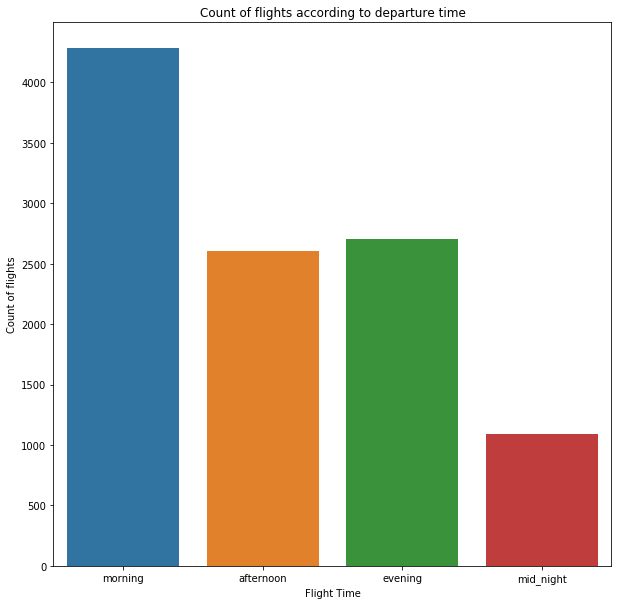

In [23]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = df_test)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

In [24]:
#from above graph its concluded that there are more number of flights in the morning time as compared to other time


In [25]:
#Converting the flight duration into seconds
import re
def convert_into_seconds(X):

    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df_test['Duration(sec)'] = df_test['Duration'].map(convert_into_seconds)

Text(0, 0.5, 'Price of ticket')

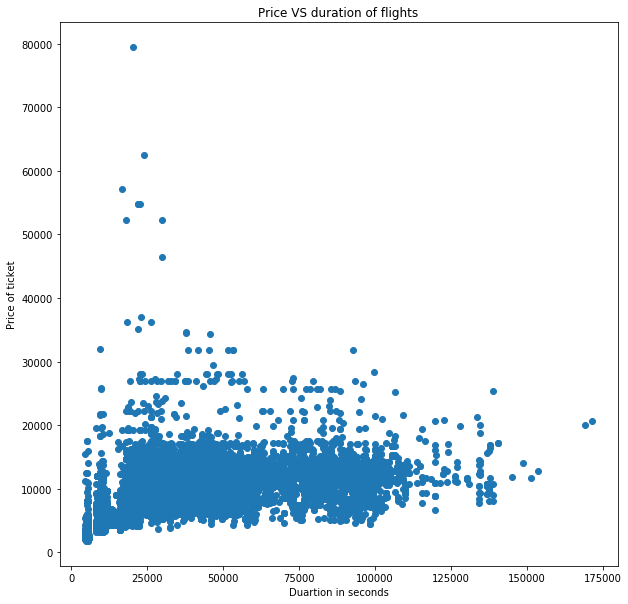

In [26]:
plt.figure(figsize = (10, 10))
plt.title('Price VS duration of flights')
plt.scatter(df_test['Duration(sec)'], df_test['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

In [27]:
df_test.corr()

,Total_Stops,Price,year,month,Day,Duration(sec)
Total_Stops,1.000000,0.603897,NaN,0.065495,-0.024136,0.738204
Price,0.603897,1.000000,NaN,0.010705,-0.165448,0.506604
year,NaN,NaN,NaN,NaN,NaN,NaN
month,0.065495,0.010705,NaN,1.000000,-0.264896,0.055147
Day,-0.024136,-0.165448,NaN,-0.264896,1.000000,-0.038422
Duration(sec),0.738204,0.506604,NaN,0.055147,-0.038422,1.000000


In [28]:
#Dropping the duplicate rows
df_test = df_test.drop_duplicates()
df_test.shape

(10462, 16)

In [29]:
df_test['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [30]:
df_test['Additional_Info'].replace('No Info', 'No info', inplace = True)

C:\Users\605822\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


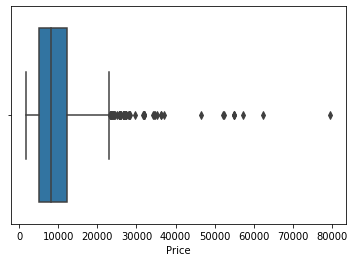

In [31]:
sns.boxplot(df_test['Price'])

In [32]:
#As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be flight ticket price also

In [33]:
df_test.to_csv('C:/DataSet/cleaned_airline_data.csv', index = None)

In [34]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
year                int64
month               int64
Day                 int64
flight_time        object
Duration(sec)       int64
dtype: object

In [36]:
df_test=df_test.drop(['Date_of_Journey'],axis=1)

In [37]:
df_test['Arrival_Time']=df_test['Arrival_Time'].str.split(' ').str[0]

In [38]:

df_test[df_test['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,flight_time,Duration(sec)


In [39]:
df_test['Total_Stops']=df_test['Total_Stops'].fillna('1 stop')


In [40]:
df_test['Total_Stops']=df_test['Total_Stops'].replace('non-stop','0 stop')

In [43]:
df_test.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
year                int64
month               int64
Day                 int64
flight_time        object
Duration(sec)       int64
dtype: object

In [44]:

df_test['Route_1']=df_test['Route'].str.split('→ ').str[0]
df_test['Route_2']=df_test['Route'].str.split('→ ').str[1]
df_test['Route_3']=df_test['Route'].str.split('→ ').str[2]
df_test['Route_4']=df_test['Route'].str.split('→ ').str[3]
df_test['Route_5']=df_test['Route'].str.split('→ ').str[4]

In [45]:
df_test['Price'].fillna((df_test['Price'].mean()),inplace=True)

In [46]:
df_test['Route_1'].fillna("None",inplace=True)
df_test['Route_2'].fillna("None",inplace=True)
df_test['Route_3'].fillna("None",inplace=True)
df_test['Route_4'].fillna("None",inplace=True)
df_test['Route_5'].fillna("None",inplace=True)

In [47]:

df_test=df_test.drop(['Route'],axis=1)
df_test=df_test.drop(['Duration'],axis=1)

In [48]:
df_test.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Total_Stops        0
Additional_Info    0
Price              0
year               0
month              0
Day                0
flight_time        0
Duration(sec)      0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [49]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_test["Airline"]=encoder.fit_transform(df_test['Airline'])
df_test["Source"]=encoder.fit_transform(df_test['Source'])
df_test["Destination"]=encoder.fit_transform(df_test['Destination'])
df_test["Additional_Info"]=encoder.fit_transform(df_test['Additional_Info'])
df_test["Route_1"]=encoder.fit_transform(df_test['Route_1'])
df_test["Route_2"]=encoder.fit_transform(df_test['Route_2'])
df_test["Route_3"]=encoder.fit_transform(df_test['Route_3'])
df_test["Route_4"]=encoder.fit_transform(df_test['Route_4'])
df_test["Route_5"]=encoder.fit_transform(df_test['Route_5'])

In [53]:
df_test['Departure_Hour'] = df_test['Dep_Time'] .str.split(':').str[0]
df_test['Departure_Minute'] = df_test['Dep_Time'] .str.split(':').str[1]

In [54]:
df_test['Departure_Hour']=df_test['Departure_Hour'].astype(int)
df_test['Departure_Minute']=df_test['Departure_Minute'].astype(int)
df_test=df_test.drop(['Dep_Time'],axis=1)

In [58]:

df_test['Arrival_Hour'] = df_test['Arrival_Time'] .str.split(':').str[0]
df_test['Arrival_Minute'] = df_test['Arrival_Time'] .str.split(':').str[1]

In [59]:
df_test['Arrival_Hour']=df_test['Arrival_Hour'].astype(int)
df_test['Arrival_Minute']=df_test['Arrival_Minute'].astype(int)
df_test=df_test.drop(['Arrival_Time'],axis=1)

In [64]:
df_test=df_test.drop(['flight_time'],axis=1)

In [65]:

df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,Day,Duration(sec),Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
9848,1,0,5,2,7,17135,2019,1,3,140700,0,7,0,6,4,8,50,23,55
6024,1,0,5,1,0,14594,2019,1,3,75900,0,33,8,12,4,11,50,8,55
2405,5,0,5,1,0,22270,2019,1,3,63300,0,7,8,12,4,14,5,7,40
10383,5,0,5,1,7,26890,2019,1,3,79500,0,7,8,12,4,7,0,5,5
8308,4,0,5,0,7,12649,2019,1,3,10500,0,13,24,12,4,18,25,21,20


In [66]:
y = df_test['Price']
X = df_test.drop('Price', axis = 1)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [68]:

print(X.mean())
X.std()

1.720552090669968e-17


0.9718253158075502

In [69]:
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [70]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8369, 18)
The size of training output is (8369,)
The size of testing input is (2093, 18)
The size of testing output is (2093,)


In [71]:
y_train_pred = np.ones(X_train.shape[0]) * y_train.mean()
y_test_pred = np.ones(X_test.shape[0]) * y_train.mean()

In [73]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

print("Root mean squared error : ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared : ", r2_score(y_train.values, y_train_pred))

Root mean squared error :  4635.105534049588
R-squared :  0.0


In [75]:
# KNN Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [76]:

print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


{'n_neighbors': 5}

In [77]:
y_train_pred =knn_regressor.predict(X_train) 
y_test_pred =knn_regressor.predict(X_test) 

In [78]:
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Root mean squared error:  1897.6971884739862
R-squared:  0.8323766272883876


In [79]:
print("Root mean squared error : ", sqrt(mse(y_test, y_test_pred)))
print("R-squared : ", r2_score(y_test, y_test_pred))

Root mean squared error :  2303.6051453173845
R-squared :  0.7471796961601196


In [81]:
#Lasso Regression
from sklearn.linear_model import Lasso
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [82]:
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [83]:
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Root mean squared error:  2303.6051453173845
R-squared:  0.7471796961601196


In [85]:
#Soo 